In [1]:
import numpy as np 
import re
import pandas as pd 
import seaborn as sns
from datetime import datetime
import time
from time import sleep
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')


#Preprocessing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# ML Libraries
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier


In [2]:
crimes = pd.read_csv('E:\Chicago_Crimes_dataset (1).csv',error_bad_lines=False)
crimes = pd.concat([crimes], ignore_index=False, axis=0)

In [3]:
crimes

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05-03-2016 23:40,013XX S SAWYER AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05-10-2016 15:56,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05-03-2016 21:40,061XX S DREXEL AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05-10-2016 15:56,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05-03-2016 23:31,053XX W CHICAGO AVE,470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05-10-2016 15:56,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05-03-2016 22:10,049XX W FULTON ST,460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05-10-2016 15:56,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05-03-2016 22:00,003XX N LOTUS AVE,820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,6,1139890.0,1901675.0,2016,05-10-2016 15:56,41.886297,-87.761751,"(41.886297242, -87.761750709)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3384640,10111143,HY299674,06/13/2015 04:12:00 PM,036XX W GRENSHAW ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,...,24.0,29.0,14,1152278.0,1894797.0,2015,08/17/2015 03:03:40 PM,41.867188,-87.716440,"(41.86718783, -87.71644019)"
1048571,3384641,10111144,HY300084,06/13/2015 09:30:00 PM,014XX S MUSEUM CAMPUS DR,870,THEFT,POCKET-PICKING,STREET,False,...,2.0,33.0,6,1179970.0,1893558.0,2015,08/17/2015 03:03:40 PM,41.863197,-87.614818,"(41.863196881, -87.614817819)"
1048572,3384642,10111146,HY300059,06/13/2015 09:40:00 PM,023XX W LAWRENCE AVE,460,BATTERY,SIMPLE,SIDEWALK,True,...,47.0,4.0,08B,1159650.0,1931817.0,2015,08/17/2015 03:03:40 PM,41.968625,-87.688354,"(41.96862488, -87.688354349)"
1048573,3384643,10111147,HY299981,06/13/2015 08:40:00 PM,051XX W THOMAS ST,313,ROBBERY,ARMED: OTHER DANGEROUS WEAPON,SIDEWALK,False,...,37.0,25.0,3,1141687.0,1906835.0,2015,08/17/2015 03:03:40 PM,41.900424,-87.755024,"(41.900423863, -87.755023892)"


In [4]:
crimes.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05-03-2016 23:40,013XX S SAWYER AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05-10-2016 15:56,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05-03-2016 21:40,061XX S DREXEL AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05-10-2016 15:56,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05-03-2016 23:31,053XX W CHICAGO AVE,470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05-10-2016 15:56,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05-03-2016 22:10,049XX W FULTON ST,460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05-10-2016 15:56,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05-03-2016 22:00,003XX N LOTUS AVE,820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,6,1139890.0,1901675.0,2016,05-10-2016 15:56,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [5]:
crimes.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)

In [6]:
crimes.tail()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1048570,3384640,10111143,HY299674,06/13/2015 04:12:00 PM,036XX W GRENSHAW ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,...,24.0,29.0,14,1152278.0,1894797.0,2015,08/17/2015 03:03:40 PM,41.867188,-87.716440,"(41.86718783, -87.71644019)"
1048571,3384641,10111144,HY300084,06/13/2015 09:30:00 PM,014XX S MUSEUM CAMPUS DR,870,THEFT,POCKET-PICKING,STREET,False,...,2.0,33.0,6,1179970.0,1893558.0,2015,08/17/2015 03:03:40 PM,41.863197,-87.614818,"(41.863196881, -87.614817819)"
1048572,3384642,10111146,HY300059,06/13/2015 09:40:00 PM,023XX W LAWRENCE AVE,460,BATTERY,SIMPLE,SIDEWALK,True,...,47.0,4.0,08B,1159650.0,1931817.0,2015,08/17/2015 03:03:40 PM,41.968625,-87.688354,"(41.96862488, -87.688354349)"
1048573,3384643,10111147,HY299981,06/13/2015 08:40:00 PM,051XX W THOMAS ST,313,ROBBERY,ARMED: OTHER DANGEROUS WEAPON,SIDEWALK,False,...,37.0,25.0,3,1141687.0,1906835.0,2015,08/17/2015 03:03:40 PM,41.900424,-87.755024,"(41.900423863, -87.755023892)"
1048574,3384644,10111148,HY300058,06/13/2015 10:00:00 PM,004XX N CENTRAL PARK BLVD,460,BATTERY,SIMPLE,BRIDGE,False,...,27.0,23.0,08B,1152273.0,1902600.0,2015,08/17/2015 03:03:40 PM,41.888600,-87.716253,"(41.888600199, -87.716252586)"


In [7]:
crimes.shape

(1048575, 23)

In [8]:
# columns present in dataset crimes
crimes.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [9]:
# Columns information including datatype and dataset details
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1048575 non-null  int64  
 1   ID                    1048575 non-null  int64  
 2   Case Number           1048575 non-null  object 
 3   Date                  1048575 non-null  object 
 4   Block                 1048575 non-null  object 
 5   IUCR                  1048575 non-null  object 
 6   Primary Type          1048575 non-null  object 
 7   Description           1048575 non-null  object 
 8   Location Description  1047927 non-null  object 
 9   Arrest                1048575 non-null  bool   
 10  Domestic              1048575 non-null  bool   
 11  Beat                  1048575 non-null  int64  
 12  District              1048574 non-null  float64
 13  Ward                  1048562 non-null  float64
 14  Community Area        1048535 non-

# Data preprocessing

In [10]:
# Multiple tuples contains Community Area code as 0.0 where the location is near O'hare airport.
#  Below shows the rows with 0 community Area code.
crimes.iloc[np.where(crimes['Community Area']==0)]

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
43786,852174,9940426,HY114520,01/14/2015 10:15:00 AM,007XX W OHARE ST,1350,CRIMINAL TRESPASS,TO STATE SUP LAND,AIRPORT EXTERIOR - SECURE AREA,True,...,NaN,0.0,26,1094587.0,1945065.0,2015,08/17/2015 03:03:40 PM,42.006074,-87.927365,"(42.006074109, -87.927364891)"
116101,2448772,8487665,HV164869,02/19/2012 06:54:00 PM,051XX S RUTHERFORD AVE,1305,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,RESIDENCE-GARAGE,False,...,23.0,0.0,14,1132249.0,1869846.0,2012,02-04-2016 06:33,41.799090,-87.790549,"(41.799089601, -87.790549465)"
132444,2465420,8514335,HV184279,03-05-2012 14:35,007XX W OHARE ST,1350,CRIMINAL TRESPASS,TO STATE SUP LAND,AIRPORT EXTERIOR - SECURE AREA,True,...,NaN,0.0,26,1094587.0,1945065.0,2012,02-04-2016 06:33,42.006074,-87.927365,"(42.006074109, -87.927364891)"
186232,2519827,8602602,HV276626,05-04-2012 04:30,065XX N MANNHEIM RD,910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,...,NaN,0.0,7,1106264.0,1941887.0,2012,02-04-2016 06:33,41.997193,-87.884464,"(41.997193305, -87.884463632)"
220291,2554110,8655272,HV296448,05/21/2012 02:05:00 PM,064XX N MANNHEIM RD,2022,NARCOTICS,POSS: COCAINE,STREET,True,...,NaN,0.0,18,1106267.0,1941351.0,2012,02-04-2016 06:33,41.995722,-87.884463,"(41.99572241, -87.884462932)"
221417,2555239,8657230,HV302379,05/25/2012 05:55:00 AM,007XX W OHARE ST,1121,DECEPTIVE PRACTICE,COUNTERFEITING DOCUMENT,AIRPORT EXTERIOR - NON-SECURE AREA,True,...,NaN,0.0,10,1094587.0,1945065.0,2012,02-04-2016 06:33,42.006074,-87.927365,"(42.006074109, -87.927364891)"
374947,2709441,8898623,HV572361,11/16/2012 10:00:00 AM,056XX N FAIRVIEW AVE,1122,DECEPTIVE PRACTICE,COUNTERFEIT CHECK,RESIDENCE,False,...,NaN,0.0,10,1119958.0,1936797.0,2012,02-04-2016 06:33,41.983018,-87.834197,"(41.983017755, -87.834196515)"
471537,2806335,9058946,HW203626,03/22/2013 09:00:00 PM,056XX N FAIRVIEW AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,DRIVEWAY - RESIDENTIAL,False,...,NaN,0.0,14,1119958.0,1936797.0,2013,02-04-2016 06:33,41.983018,-87.834197,"(41.983017755, -87.834196515)"
559040,2894025,9197341,HW333864,06/23/2013 08:15:00 PM,007XX W OHARE ST,820,THEFT,$500 AND UNDER,AIRPORT EXTERIOR - SECURE AREA,False,...,NaN,0.0,6,1094587.0,1945065.0,2013,02-04-2016 06:33,42.006074,-87.927365,"(42.006074109, -87.927364891)"
715002,3050270,9451711,HX105019,12/19/2013 01:35:00 PM,065XX N MANNHEIM RD,910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,...,NaN,0.0,7,1106264.0,1941887.0,2013,02-04-2016 06:33,41.997193,-87.884464,"(41.997193305, -87.884463632)"


In [11]:
# check for values
#update community area from 0 to 76 which is community area code of O'hare 
crimes.iloc[np.where(crimes['Community Area']==0)[0],13]=76

In [12]:
# Creating list of Area name with Community Area code.
areas = {
"1": "Rogers Park Chicago",
"2": "West Ridge Chicago",
"3": "Uptown Chicago",
"4": "Lincoln Square Chicago",
"5": "North Center Chicago",
"6": "Lakeview Chicago",
"7": "Lincoln Park Chicago",
"8": "Near North Side Chicago",
"9": "Edison Park Chicago",
"10": "Norwood Park Chicago",
"11": "Jefferson Park Chicago",
"12": "Forest Glen Chicago",
"13": "North Park Chicago",
"14": "Albany Park Chicago",
"15": "Portage Park Chicago",
"16": "Irving Park Chicago",
"17": "Dunning Chicago",
"18": "Montclare Chicago",
"19": "Belmont Cragin Chicago",
"20": "Hermosa Chicago",
"21": "Avondale Chicago",
"22": "Logan Square Chicago",
"23": "Humboldt Park Chicago",
"24": "West Town Chicago",
"25": "Austin Chicago",
"26": "West Garfield Park Chicago",
"27": "East Garfield Park Chicago",
"28": "Near West Side Chicago",
"29": "North Lawndale Chicago",
"30": "South Lawndale Chicago",
"31": "Lower West Side Chicago",
"32": "Loop Chicago",
"33": "Near South Side Chicago",
"34": "Armour Square Chicago",
"35": "Douglas Chicago",
"36": "Oakland Chicago",
"37": "Fuller Park Chicago",
"38": "Grand Boulevard Chicago",
"39": "Kenwood Chicago",
"40": "Washington Park Chicago",
"41": "Hyde Park Chicago",
"42": "Woodlawn Chicago",
"43": "South Shore Chicago",
"44": "Chatham Chicago",
"45": "Avalon Park Chicago",
"46": "South Chicago",
"47": "Burnside Chicago",
"48": "Calumet Heights Chicago",
"49": "Roseland Chicago",
"50": "Pullman Chicago",
"51": "South Deering Chicago",
"52": "East Side Chicago",
"53": "West Pullman Chicago",
"54": "Riverdale Chicago",
"55": "Hegewisch Chicago",
"56": "Garfield Ridge Chicago",
"57": "Archer Heights Chicago",
"58": "Brighton Park Chicago",
"59": "McKinley Park Chicago",
"60": "Bridgepor Chicagot",
"61": "New City Chicago",
"62": "West Elsdon Chicago",
"63": "Gage Park Chicago",
"64": "Clearing Chicago",
"65": "West Lawn Chicago",
"66": "Chicago Lawn Chicago",
"67": "West Englewood Chicago",
"68": "Englewood Chicago",
"69": "Greater Grand Crossing Chicago",
"70": "Ashburn Chicago",
"71": "Auburn Gresham Chicago",
"72": "Beverly Chicago",
"73": "Washington Heights Chicago",
"74": "Mount Greenwood Chicago",
"75": "Morgan Park Chicago",
"76": "O'Hare Chicago",
"77": "Edgewater Chicago"
}

In [13]:
# converting Community area code to correct datatype and map it with areas list to generate new column 'Area Name' w.r.t
# community area code.
crimes['Community Area'] = crimes['Community Area'].astype(float)
crimes['Community Area'].fillna(0, inplace=True)
crimes['Community Area new'] = crimes['Community Area'].astype(int)
crimes['Community Area'] = crimes['Community Area new'].astype(str)
crimes.iloc[np.where(crimes['Community Area']=='0')[0],13]='76'
crimes['Area Name'] = crimes['Community Area'].map(areas)

In [14]:
# Represents columns having missing values
crimes.columns[crimes.isnull().any()].tolist()
dfEmpty=crimes.isnull().sum()

In [15]:
#Representing Null or Nan values present in any column of crime dataset.
null_data = crimes[crimes.isnull().any(axis=1)]
#null_data

In [16]:
# number of duplicate rows in each column
print(dfEmpty)

Unnamed: 0                 0
ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     648
Arrest                     0
Domestic                   0
Beat                       0
District                   1
Ward                       2
Community Area             0
FBI Code                   0
X Coordinate            8705
Y Coordinate            8705
Year                       0
Updated On                 0
Latitude                8705
Longitude               8705
Location                8705
Community Area new         0
Area Name                 52
dtype: int64


In [17]:
Target = 'Primary Type'
print('Target: ', Target)

Target:  Primary Type


In [18]:
# Crimes types in the data

crimes['Primary Type'].unique()

array(['BATTERY', 'PUBLIC PEACE VIOLATION', 'THEFT', 'WEAPONS VIOLATION',
       'ROBBERY', 'MOTOR VEHICLE THEFT', 'ASSAULT', 'OTHER OFFENSE',
       'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'BURGLARY', 'STALKING', 'CRIM SEXUAL ASSAULT', 'NARCOTICS',
       'SEX OFFENSE', 'OBSCENITY', 'OFFENSE INVOLVING CHILDREN',
       'KIDNAPPING', 'HOMICIDE', 'INTERFERENCE WITH PUBLIC OFFICER',
       'PROSTITUTION', 'GAMBLING', 'INTIMIDATION', 'ARSON',
       'LIQUOR LAW VIOLATION', 'NON-CRIMINAL', 'PUBLIC INDECENCY',
       'HUMAN TRAFFICKING', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON - CRIMINAL', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [19]:
# Pulling distinct date from the datasets as shown below there are only 1.2 million ut of 3.3 million of data.
crimes['Date'].nunique()

411644

In [20]:
# convert dates to pandas datetime format

#crimes['Date'] = pd.to_datetime(crimes['Date'], format='%m/%d/%Y %H:%M:%S %p')
crimes['Date'] = crimes['Date'].astype('datetime64[ns]')

# setting the index to be the date will help us a lot later on
crimes.index = pd.DatetimeIndex(crimes.Date)


In [21]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1048575 entries, 2016-05-03 23:40:00 to 2015-06-13 22:00:00
Data columns (total 25 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Unnamed: 0            1048575 non-null  int64         
 1   ID                    1048575 non-null  int64         
 2   Case Number           1048575 non-null  object        
 3   Date                  1048575 non-null  datetime64[ns]
 4   Block                 1048575 non-null  object        
 5   IUCR                  1048575 non-null  object        
 6   Primary Type          1048575 non-null  object        
 7   Description           1048575 non-null  object        
 8   Location Description  1047927 non-null  object        
 9   Arrest                1048575 non-null  bool          
 10  Domestic              1048575 non-null  bool          
 11  Beat                  1048575 non-null  int64         
 12  District 

In [22]:
crimes["jdate"] = crimes['Date'].dt.date

In [23]:
loc_to_change  = list(crimes['Location Description'].value_counts()[20:].index)
crimes.loc[crimes['Location Description'].isin(loc_to_change) , crimes.columns=='Location Description'] = 'OTHER'

In [24]:
from sklearn import preprocessing

In [25]:
def label_encoder(df, column_name):
    label_encoder = preprocessing.LabelEncoder()

    df[column_name]= label_encoder.fit_transform(df[column_name])
    print(column_name)
    for i in range(len(df[column_name].unique())):
        print("For {} : {}".format(i, label_encoder.inverse_transform([i])))
    print('-'*10)
    print(df[column_name].value_counts())
    print('-'*10)
    
    return df[column_name], label_encoder
crimes['Description'], label_encoder_posted_by = label_encoder(crimes, 'Description')
crimes['Primary Type'], label_encoder_posted_by = label_encoder(crimes, 'Primary Type')
descriptions=['$500 AND UNDER','ABUSE/NEGLECT: CARE FACILITY','AGG CRIM SEX ABUSE FAM MEMBER','AGG CRIMINAL SEXUAL ABUSE','AGG PO HANDS ETC SERIOUS INJ','AGG PO HANDS NO/MIN INJURY','AGG PRO EMP HANDS SERIOUS INJ','AGG PRO.EMP: HANDGUN','AGG PRO.EMP: OTHER DANG WEAPON','AGG PRO.EMP: OTHER FIREARM','AGG PRO.EMP:KNIFE/CUTTING INST','AGG SEX ASSLT OF CHILD FAM MBR','AGG: FINANCIAL ID THEFT','AGG: HANDS/FIST/FEET NO/MINOR INJURY',
             'AGG: HANDS/FIST/FEET SERIOUS INJURY','AGGRAVATED','AGGRAVATED COMPUTER TAMPERING','AGGRAVATED DOMESTIC BATTERY: HANDGUN','AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET SERIOUS INJURY','AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST','AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON','AGGRAVATED FINANCIAL IDENTITY THEFT','AGGRAVATED OF A CHILD','AGGRAVATED OF A SENIOR CITIZEN','AGGRAVATED OF A UNBORN CHILD','AGGRAVATED PO: HANDGUN','AGGRAVATED PO: KNIFE/CUT INSTR',
             'AGGRAVATED PO: OTHER DANG WEAP','AGGRAVATED PO: OTHER FIREARM','AGGRAVATED PO:KNIFE/CUT INSTR','AGGRAVATED VEHICULAR HIJACKING','AGGRAVATED: HANDGUN','AGGRAVATED: KNIFE/CUT INSTR','AGGRAVATED: OTHER','AGGRAVATED: OTHER DANG WEAPON','AGGRAVATED: OTHER FIREARM','AGGRAVATED:KNIFE/CUTTING INSTR','AIDING ARRESTEE ESCAPE','ALTER COINS','ALTER/FORGE PRESCRIPTION','ANIMAL ABUSE/NEGLECT','ANIMAL FIGHTING','ARMED VIOLENCE','ARMED WHILE UNDER THE INFLUENCE','ARMED: HANDGUN','ARMED: OTHER DANGEROUS WEAPON'
            'ARMED: OTHER FIREARM','ARMED:KNIFE/CUTTING INSTRUMENT','ARSON THREAT','ARSONIST: ANNUAL REGISTRATION','ATT AGG CRIMINAL SEXUAL ABUSE','ATT CRIM SEXUAL ABUSE','ATT: AUTOMOBILE','ATT: TRUCK, BUS, MOTOR HOME','ATTEMPT - FINANCIAL IDENTITY THEFT','ATTEMPT AGG: HANDGUN','ATTEMPT AGG: KNIFE/CUT INSTR','ATTEMPT AGG: OTHER','ATTEMPT AGG: OTHER DANG WEAPON','ATTEMPT ARSON','ATTEMPT FINANCIAL IDENTITY THEFT','ATTEMPT FORCIBLE ENTRY','ATTEMPT NON-AGGRAVATED','ATTEMPT POSSESSION CANNABIS','ATTEMPT POSSESSION NARCOTICS','ATTEMPT THEFT','ATTEMPT: AGGRAVATED',
        'ATTEMPT: ARMED-HANDGUN','ATTEMPT: ARMED-KNIFE/CUT INSTR','ATTEMPT: ARMED-KNIFE/CUT INSTR','ATTEMPT: ARMED-OTHER DANG WEAP','ATTEMPT: ARMED-OTHER FIREARM','ATTEMPT: CYCLE, SCOOTER, BIKE NO VIN','ATTEMPT: CYCLE, SCOOTER, BIKE W-VIN','ATTEMPT: STRONGARM-NO WEAPON','AUTOMOBILE','BIGAMY','BOARD PLANE WITH WEAPON','BOGUS CHECK','BOMB THREAT','BOOKMAKING/SPORTS','BRIBERY','BY EXPLOSIVE','BY FIRE','CALCULATED CANNABIS CONSPIRACY','CALL OPERATION','CANNABIS PLANT','CHILD ABANDONMENT','CHILD ABDUCTION','CHILD ABDUCTION/STRANGER','CHILD ABUSE'
            'CHILD PORNOGRAPHY', 'COMMERCIAL SEX ACTS','COMPELLING CONFESSION','COMPELLING ORG MEMBERSHIP','COMPOUNDING A CRIME','COMPUTER FRAUD','CONCEALED CARRY LICENSE REVOCATION','CONCEALING/AIDING A FUGITIVE','CONT SUBS:FAIL TO MAINT RECORD','CONTRIBUTE CRIM DELINQUENCY JUVENILE','CONTRIBUTE DELINQUENCY OF A CHILD','COUNTERFEIT CHECK','COUNTERFEITING DOCUMENT','CREDIT CARD FRAUD','CRIM SEX ABUSE BY FAM MEMBER','CRIMINAL DEFACEMENT','CRIMINAL DRUG CONSPIRACY','CRIMINAL SEXUAL ABUSE','CRIMINAL TRANSMISSION OF HIV','CYBERSTALKING',
             'CYCLE, SCOOTER, BIKE NO VIN','CYCLE, SCOOTER, BIKE W-VIN','DECEPTIVE COLLECTION PRACTICES','DEFACE IDENT MARKS OF FIREARM','DEL CONT SUBS TO PERSON <18','DELIVERY CONTAINER THEFT','DOMESTIC BATTERY SIMPLE','EAVESDROPPING','EDUCATIONAL INTIMIDAITON','EMBEZZLEMENT','EMPLOY MINOR','ENDANGERING LIFE/HEALTH CHILD','ESCAPE','EXTORTION','FAIL REGISTER LIC:CONT SUBS','FALSE FIRE ALARM','FALSE POLICE REPORT','FALSE/STOLEN/ALTERED TRP','FINAN EXPLOIT-ELDERLY/DISABLED','FINANCIAL ID THEFT: OVER $300','FIREARM REGISTRATION VIOLATION','FIRST DEGREE MURDER','FOID - REVOCATION',
             'FORCIBLE DETENTION','FORCIBLE ENTRY','FORFEIT PROPERTY','FORGERY','FORNICATION','FOUND PASSPORT','FOUND SUSPECT NARCOTICS','FRAUD OR CONFIDENCE GAME','FROM BUILDING','FROM COIN-OP MACHINE/DEVICE','GAME/AMUSEMENT DEVICE','GAME/CARDS','GAME/DICE','GUN OFFENDER NOTIFICATION-NO CONTACT','GUN OFFENDER: ANNUAL REGISTRATION','GUN OFFENDER: DUTY TO REGISTER','GUN OFFENDER: DUTY TO REPORT CHANGE OF INFORMATION','HARASSMENT BY ELECTRONIC MEANS','HARASSMENT BY TELEPHONE','HARASSMENT BY TELEPHONE','HARBOR RUNAWAY','HAZARDOUS MATERIALS VIOLATION','HAZARDOUS MATERIALS VIOLATION',
             'ILLEGAL CONSUMPTION BY MINOR','ILLEGAL POSSESSION CASH CARD','IMPERSONATION','IN TAVERN','INDECENT SOLICITATION/ADULT','INDECENT SOLICITATION/CHILD','INSTITUTIONAL VANDALISM','INSURANCE FRAUD','INTERFERE W/ EMERGENCY EQUIP','INTERFERE W/ HIGHER EDUCATION','INTERFERENCE JUDICIAL PROCESS','INTIMIDATION','INTOXICATING COMPOUNDS','INVOLUNTARY MANSLAUGHTER','INVOLUNTARY SERVITUDE','JUVENILE PIMPING','KEEP PLACE OF PROSTITUTION','KIDNAPPING','LIBRARY THEFT','LIBRARY VANDALISM','LICENSE VIOLATION','LICENSED PREMISE','LIQUOR LICENSE VIOLATION','LOST PASSPORT','MANU/DEL:CANNABIS 10GM OR LESS',
              'MANU/DEL:CANNABIS OVER 10 GMS','MANU/DELIVER: HALLUCINOGEN','MANU/DELIVER: HEROIN (WHITE)','MANU/DELIVER: HEROIN(BRN/TAN)','MANU/DELIVER: METHAMPHETAMINES','MANU/DELIVER:AMPHETAMINES','MANU/DELIVER:BARBITUATES','MANU/DELIVER:COCAINE','MANU/DELIVER:CRACK','MANU/DELIVER:HEROIN(BLACK TAR)','MANU/DELIVER:LOOK-ALIKE DRUG','MANU/DELIVER:LOOK-ALIKE DRUG','MANU/DELIVER:PCP','MANU/DELIVER:SYNTHETIC DRUGS','MANU/POSS. W/INTENT TO DELIVER: SYNTHETIC MARIJUANA','MINOR MISREPRESENT AGE','MOB ACTION','MONEY LAUNDERING','NON-AGGRAVATED','NOTIFICATION OF CIVIL NO CONTACT ORDER','NOTIFICATION OF STALKING - NO CONTACT ORDER'
             'OBSCENE MATTER','OBSCENE TELEPHONE CALLS','OBSCENITY','OBSTRUCTING IDENTIFICATION','OBSTRUCTING JUSTICE','OBSTRUCTING SERVICE','OF UNBORN CHILD','OFFICIAL MISCONDUCT','OTHER','OTHER ARSON/EXPLOSIVE INCIDENT','OTHER CRIME AGAINST PERSON','OTHER CRIME INVOLVING PROPERTY','OTHER OFFENSE','OTHER PROSTITUTION OFFENSE','OTHER VEHICLE OFFENSE','OTHER VIOLATION','OTHER WEAPONS VIOLATION','OVER $500','PANDERING','PAROLE VIOLATION','PATRONIZE JUVENILE PROSTITUTE','PATRONIZING A PROSTITUTE','PAY TV SERVICE OFFENSES','PEEPING TOM','PIMPING','POCKET-PICKING','POS: CHEMICAL/DRY-ICE DEVICE','POS: EXPLOSIVE/INCENDIARY DEV',
'PURSE-SNATCHING','RECKLESS CONDUCT','RECKLESS FIREARM DISCHARGE','RECKLESS HOMICIDE','RESIST/OBSTRUCT/DISARM OFFICER','RETAIL THEFT','SALE TOBACCO PRODUCTS TO MINOR','SALE/DEL DRUG PARAPHERNALIA','SALE/DEL HYPODERMIC NEEDLE','SALE/DIST OBSCENE MAT TO MINOR','SELL/ADVERTISE FIREWORKS','SELL/GIVE/DEL LIQUOR TO MINOR','SEX ASSLT OF CHILD BY FAM MBR','SEX OFFENDER: FAIL REG NEW ADD','SEX OFFENDER: FAIL TO REGISTER','SEX OFFENDER: PROHIBITED ZONE','SEX RELATION IN FAMILY','SEXUAL EXPLOITATION OF A CHILD','SIMPLE','SOLICIT FOR BUSINESS','SOLICIT FOR PROSTITUTE','SOLICIT NARCOTICS ON PUBLICWAY','SOLICIT OFF PUBLIC WAY','SOLICIT ON PUBLIC WAY',
              'STOLEN PROP: BUY/RECEIVE/POS.','STRONGARM - NO WEAPON','TAMPER WITH MOTOR VEHICLE','TELEPHONE THREAT','THEFT BY LESSEE,MOTOR VEH','THEFT BY LESSEE,NON-VEH','THEFT OF LABOR/SERVICES','THEFT OF LOST/MISLAID PROP','THEFT/RECOVERY: AUTOMOBILE','THEFT/RECOVERY: CYCLE, SCOOTER, BIKE NO VIN','THEFT/RECOVERY: CYCLE, SCOOTER, BIKE W-VIN','THEFT/RECOVERY: TRUCK,BUS,MHOME','TO AIRPORT','TO CITY OF CHICAGO PROPERTY','TO FIRE FIGHT.APP.EQUIP','TO LAND','TO PROPERTY','TO RESIDENCE','TO STATE SUP LAND','TO STATE SUP PROP','TO VEHICLE','TRUCK, BUS, MOTOR HOME','UNAUTHORIZED VIDEOTAPING','UNIDENTIFIABLE RECORDING SOUND','UNLAWFUL ENTRY',
              'UNLAWFUL INTERFERE/VISITATION','UNLAWFUL POSS AMMUNITION','UNLAWFUL POSS OF HANDGUN','UNLAWFUL POSS OTHER FIREARM','UNLAWFUL RESTRAINT','UNLAWFUL SALE HANDGUN','UNLAWFUL USE OF A COMPUTER','UNLAWFUL USE OF BODY ARMOR','UNLAWFUL USE OF RECORDED SOUND','UNLAWFUL USE OTHER DANG WEAPON','UNLAWFUL USE OTHER FIREARM','UNLAWFUL USE/SALE AIR RIFLE','VEHICLE TITLE/REG OFFENSE','VEHICULAR HIJACKING','VIO BAIL BOND: DOM VIOLENCE','VIOLATE ORDER OF PROTECTION','VIOLATION GPS MONITORING DEVICE','VIOLATION OF CIVIL NO CONTACT ORDER','VIOLATION OF SMOKING BAN','VIOLATION OF STALKING NO CONTACT ORDER','VIOLENT OFFENDER: ANNUAL REGISTRATION','VIOLENT OFFENDER: DUTY TO REGISTER','VIOLENT OFFENDER: FAIL TO REGISTER NEW ADDRESS']

Description
For 0 : ['$500 AND UNDER']
For 1 : ['ABUSE/NEGLECT: CARE FACILITY']
For 2 : ['AGG CRIM SEX ABUSE FAM MEMBER']
For 3 : ['AGG CRIMINAL SEXUAL ABUSE']
For 4 : ['AGG PO HANDS ETC SERIOUS INJ']
For 5 : ['AGG PO HANDS NO/MIN INJURY']
For 6 : ['AGG PRO EMP HANDS SERIOUS INJ']
For 7 : ['AGG PRO.EMP: HANDGUN']
For 8 : ['AGG PRO.EMP: OTHER DANG WEAPON']
For 9 : ['AGG PRO.EMP: OTHER FIREARM']
For 10 : ['AGG PRO.EMP:KNIFE/CUTTING INST']
For 11 : ['AGG SEX ASSLT OF CHILD FAM MBR']
For 12 : ['AGG: FINANCIAL ID THEFT']
For 13 : ['AGG: HANDS/FIST/FEET NO/MINOR INJURY']
For 14 : ['AGG: HANDS/FIST/FEET SERIOUS INJURY']
For 15 : ['AGGRAVATED']
For 16 : ['AGGRAVATED COMPUTER TAMPERING']
For 17 : ['AGGRAVATED DOMESTIC BATTERY: HANDGUN']
For 18 : ['AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET SERIOUS INJURY']
For 19 : ['AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST']
For 20 : ['AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON']
For 21 : ['AGGRAVATED FINANCIAL IDENTITY THEFT']
For 22 : ['AGGRAVAT

In [26]:
len(descriptions)

300

In [27]:
# Convert Categorical Attributes to Numerical
crimes['Block'] = pd.factorize(crimes["Block"])[0]
crimes['IUCR'] = pd.factorize(crimes["IUCR"])[0]
#crimes['Description'] = pd.factorize(crimes["Description"])[0]
crimes['Location Description'] = pd.factorize(crimes["Location Description"])[0]
crimes['FBI Code'] = pd.factorize(crimes["FBI Code"])[0]
crimes['Location'] = pd.factorize(crimes["Location"])[0]

In [28]:
# Here we are categorizing the data in generic category like SEX ASSAULT, NARCOTICS, NONVIOLENT, THEFT, OTHER, VIOLENT, CRIMINAL DAMAGE, MURDER and ARSON

crimes.loc[crimes['Primary Type'].isin(["CRIM SEXUAL ASSAULT","PROSTITUTION", "SEX OFFENSE","ASSAULT"]), 'PTYPE2'] = "SEX ASSAULT"
crimes.loc[crimes['Primary Type'].isin(["NARCOTICS","OTHER","NARCOTIC VIOLATION","OTHER NARCOTIC VIOLATION","DECEPTIVE PRACTICE"]), 'PTYPE2'] = "NARCOTICS"
crimes.loc[crimes['Primary Type'].isin(["GAMBLING",
      "INTERFERE WITH PUBLIC OFFICER",
      "INTERFERENCE WITH PUBLIC OFFICER",
      "INTIMIDATION",
      "LIQUOR LAW VIOLATION",
      "OBSCENITY",
      "NON-CRIMINAL",
      "PUBLIC PEACE VIOLATION",
      "PUBLIC INDECENCY",
      "STALKING","CONCEALED CARRY LICENSE VIOLATION",
      "NON-CRIMINAL (SUBJECT SPECIFIED)","NON - CRIMINAL"]), 'PTYPE2'] = "NONVIOLENT"
crimes.loc[crimes['Primary Type'].isin(["MOTOR VEHICLE THEFT","THEFT","BURGLARY","ROBBERY"]), 'PTYPE2'] = "THEFT"
crimes.loc[crimes['Primary Type'].isin(["OTHER OFFENSE", "OFFENSE INVOLVING CHILDREN"]), 'PTYPE2'] = "OTHER"
crimes.loc[crimes['Primary Type'].isin(["KIDNAPPING", "WEAPONS VIOLATION", "OFFENSE INVOLVING CHILDREN","HUMAN TRAFFICKING"]), 'PTYPE2'] = "VIOLENT"
crimes.loc[crimes['Primary Type'].isin(["CRIMINAL DAMAGE","CRIMINAL TRESPASS"]), 'PTYPE2'] = "CRIMINAL DAMAGE"
crimes.loc[crimes['Primary Type'].isin(["BATTERY","HOMICIDE"]), 'PTYPE2'] = "MURDER"
crimes.loc[crimes['Primary Type'].isin(["ARSON"]), 'PTYPE2'] = "ARSON"
#crimes

C:\Users\vushk\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [29]:
# converting below columns categorical format for better visualization
#crimes['Primary Type']               = pd.Categorical(crimes['Primary Type'])
crimes['Location Description'] = pd.Categorical(crimes['Location Description'])
crimes['Description']          = pd.Categorical(crimes['Description'])

In [30]:
crimes

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Community Area new,Area Name,jdate,PTYPE2
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,2016-05-03 23:40:00,0,0,2,117,0,True,...,1893681.0,2016,05-10-2016 15:56,41.864073,-87.706819,0,29,North Lawndale Chicago,2016-05-03,NaN
2016-05-03 21:40:00,89,10508695,HZ250409,2016-05-03 21:40:00,1,0,2,117,1,False,...,1864330.0,2016,05-10-2016 15:56,41.782922,-87.604363,1,42,Woodlawn Chicago,2016-05-03,NaN
2016-05-03 23:31:00,197,10508697,HZ250503,2016-05-03 23:31:00,2,1,27,261,2,False,...,1904819.0,2016,05-10-2016 15:56,41.894908,-87.758372,2,25,Austin Chicago,2016-05-03,NaN
2016-05-03 22:10:00,673,10508698,HZ250424,2016-05-03 22:10:00,3,2,2,278,3,False,...,1901475.0,2016,05-10-2016 15:56,41.885687,-87.749516,3,25,Austin Chicago,2016-05-03,NaN
2016-05-03 22:00:00,911,10508699,HZ250455,2016-05-03 22:00:00,4,3,31,0,1,False,...,1901675.0,2016,05-10-2016 15:56,41.886297,-87.761751,4,25,Austin Chicago,2016-05-03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-13 16:12:00,3384640,10111143,HY299674,2015-06-13 16:12:00,2184,15,6,300,0,False,...,1894797.0,2015,08/17/2015 03:03:40 PM,41.867188,-87.716440,315712,29,North Lawndale Chicago,2015-06-13,NaN
2015-06-13 21:30:00,3384641,10111144,HY300084,2015-06-13 21:30:00,2131,71,31,231,2,False,...,1893558.0,2015,08/17/2015 03:03:40 PM,41.863197,-87.614818,2211,33,Near South Side Chicago,2015-06-13,NaN
2015-06-13 21:40:00,3384642,10111146,HY300059,2015-06-13 21:40:00,12783,2,2,278,3,True,...,1931817.0,2015,08/17/2015 03:03:40 PM,41.968625,-87.688354,292791,4,Lincoln Square Chicago,2015-06-13,NaN


# Visualization

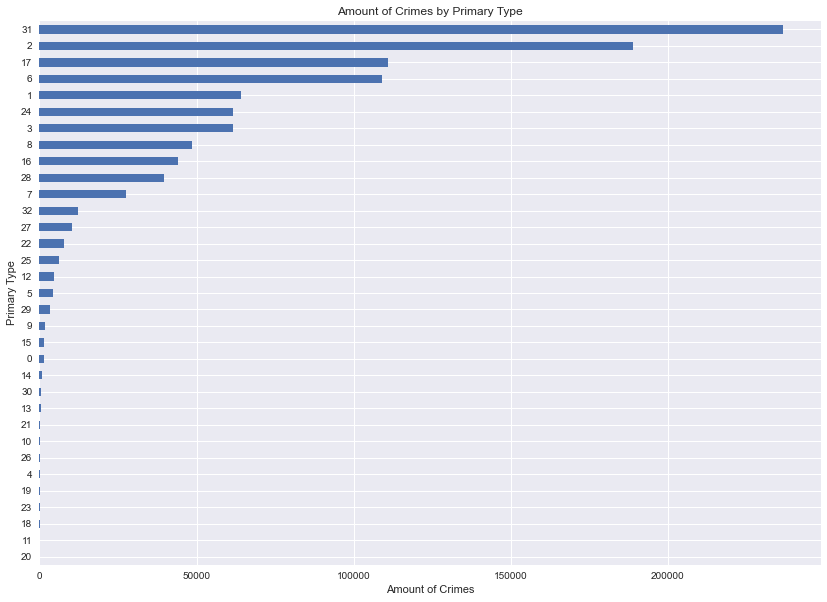

In [31]:
# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

crimes.groupby([crimes['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

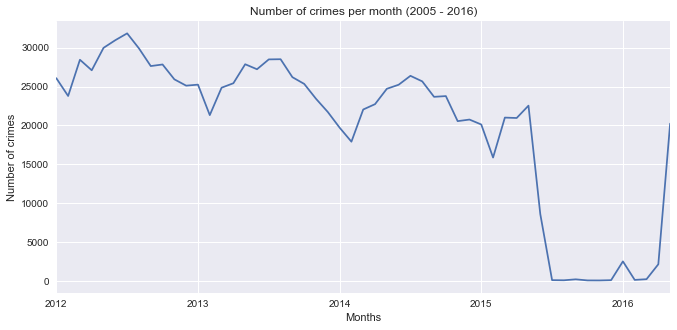

In [32]:
plt.figure(figsize=(11,5))
crimes.resample('M').size().plot()
plt.title('Number of crimes per month (2005 - 2016)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

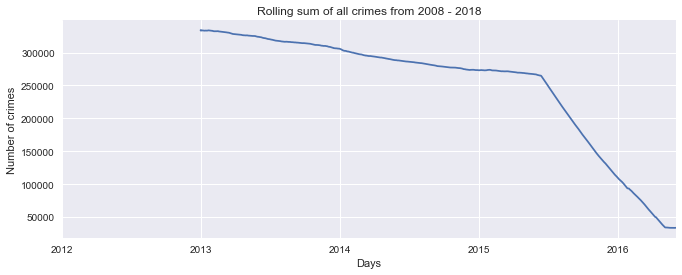

In [33]:
plt.figure(figsize=(11,4))
crimes.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2008 - 2018')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

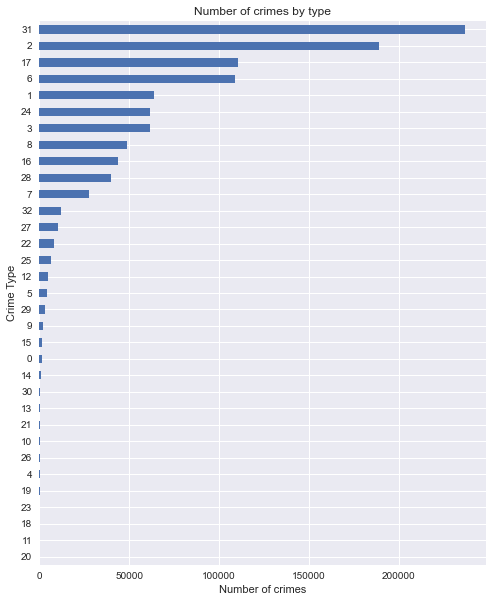

In [34]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

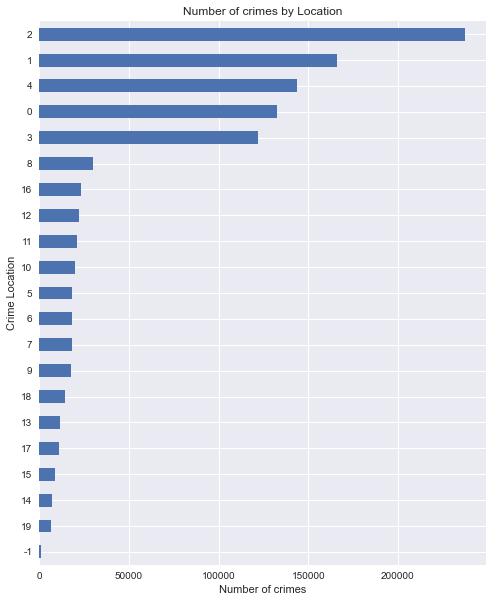

In [35]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

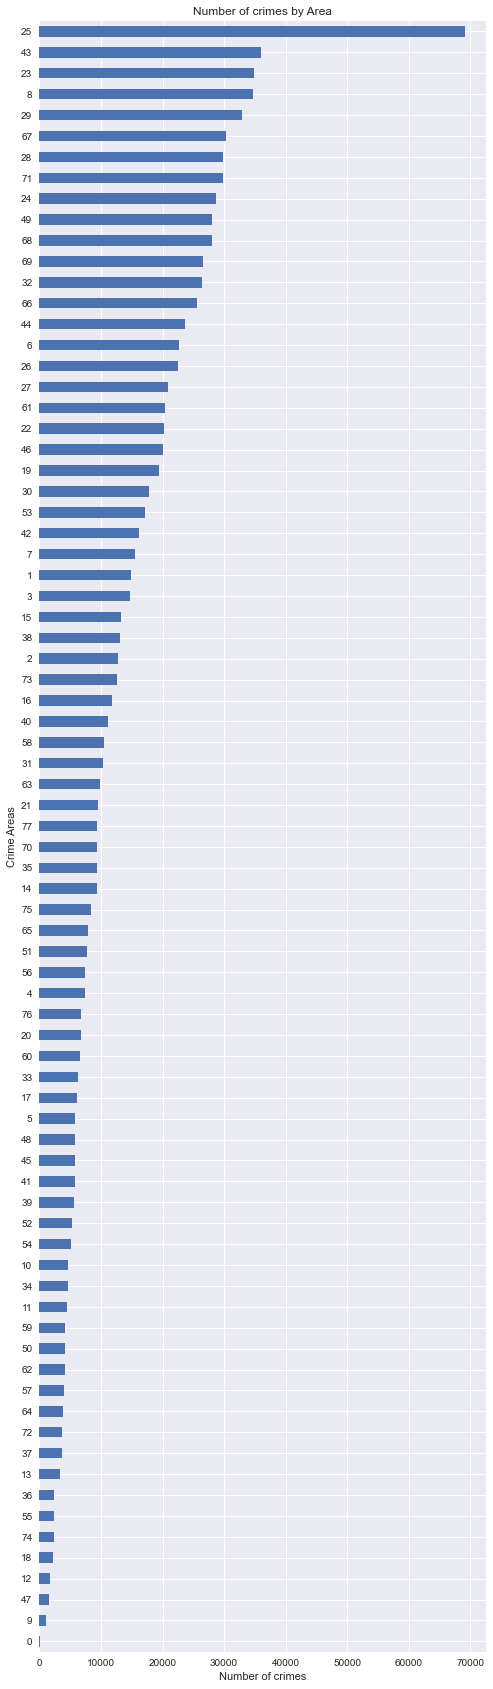

In [36]:
plt.figure(figsize=(8,30))
crimes.groupby([crimes['Community Area']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Area')
plt.ylabel('Crime Areas')
plt.xlabel('Number of crimes')
plt.show()

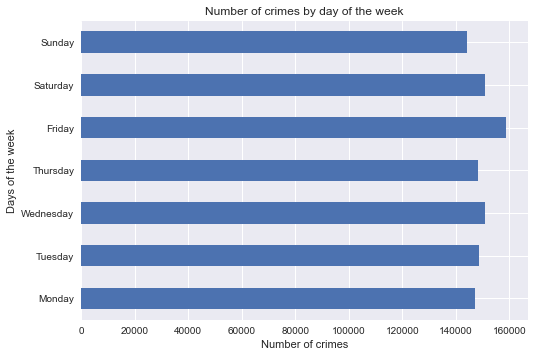

In [37]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes.groupby([crimes.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

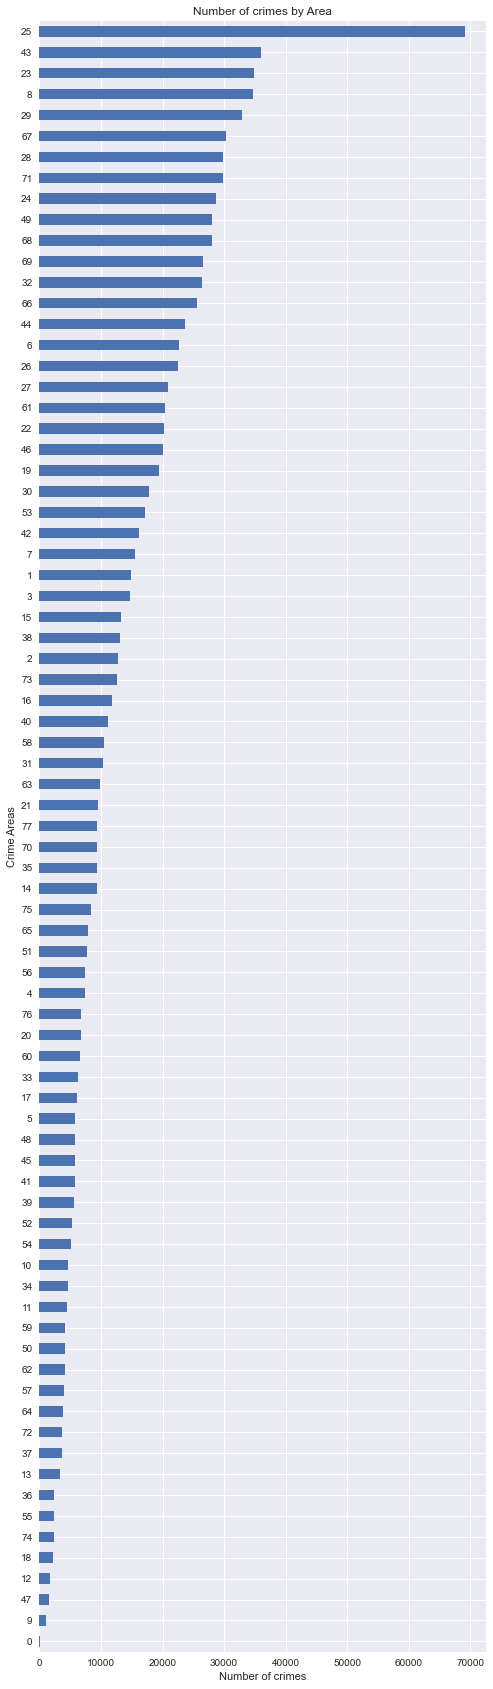

In [38]:
plt.figure(figsize=(8,30))
crimes.groupby([crimes['Community Area']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Area')
plt.ylabel('Crime Areas')
plt.xlabel('Number of crimes')
plt.show()

C:\Users\vushk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vushk\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'All Crime Distribution per District')

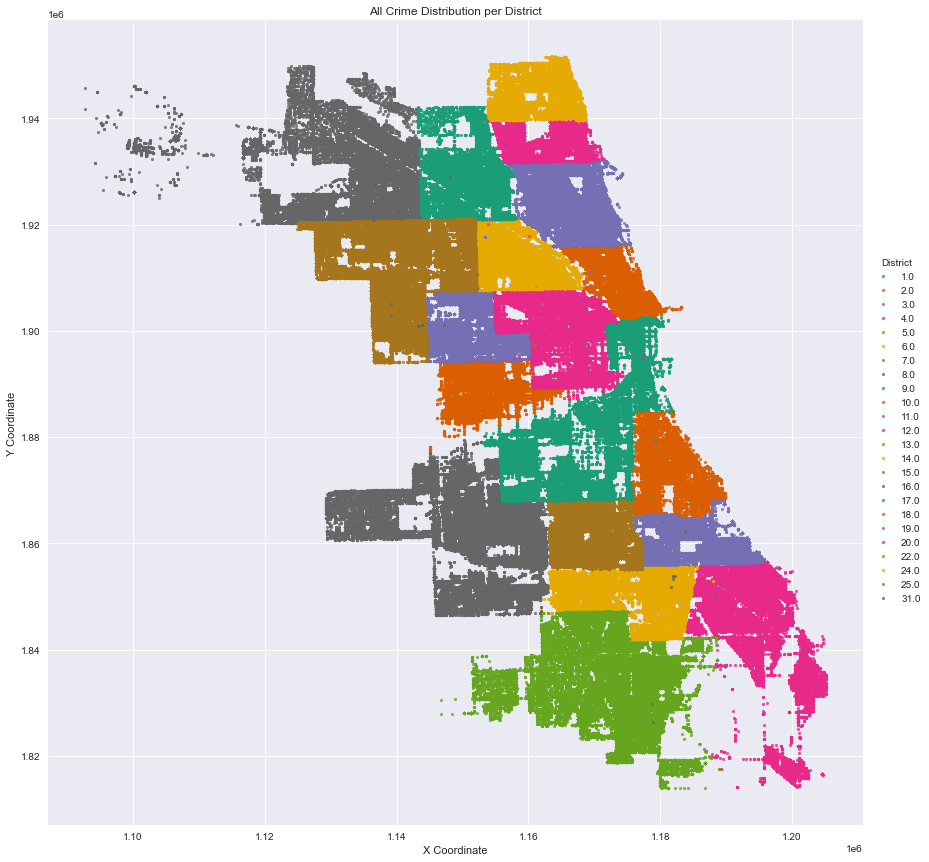

In [39]:
import seaborn as sns
sns.set_style("darkgrid")

# Created a scatterplot of X and Y coordinates vs all crime data available in the dataset

crimes = crimes.loc[(crimes['X Coordinate']!=0)]

sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=crimes[:],
           fit_reg=False, 
           hue="District",
           palette='Dark2',
           size=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("All Crime Distribution per District")

In [41]:

Classes = crimes['Primary Type'].unique()
Classes

array([ 2, 27, 31, 32, 28, 16,  1, 24,  8,  6,  7,  3, 30,  5, 17, 29, 21,
       22, 14, 10, 12, 25,  9, 13,  0, 15, 19, 26, 11,  4, 18, 23, 20])

In [42]:
#Encode target labels into categorical variables:
crimes['Primary Type'] = pd.factorize(crimes["Primary Type"])[0] 
crimes['Primary Type'].unique()

<ipython-input-42-d3c2f75b1408>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimes['Primary Type'] = pd.factorize(crimes["Primary Type"])[0]


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
      dtype=int64)

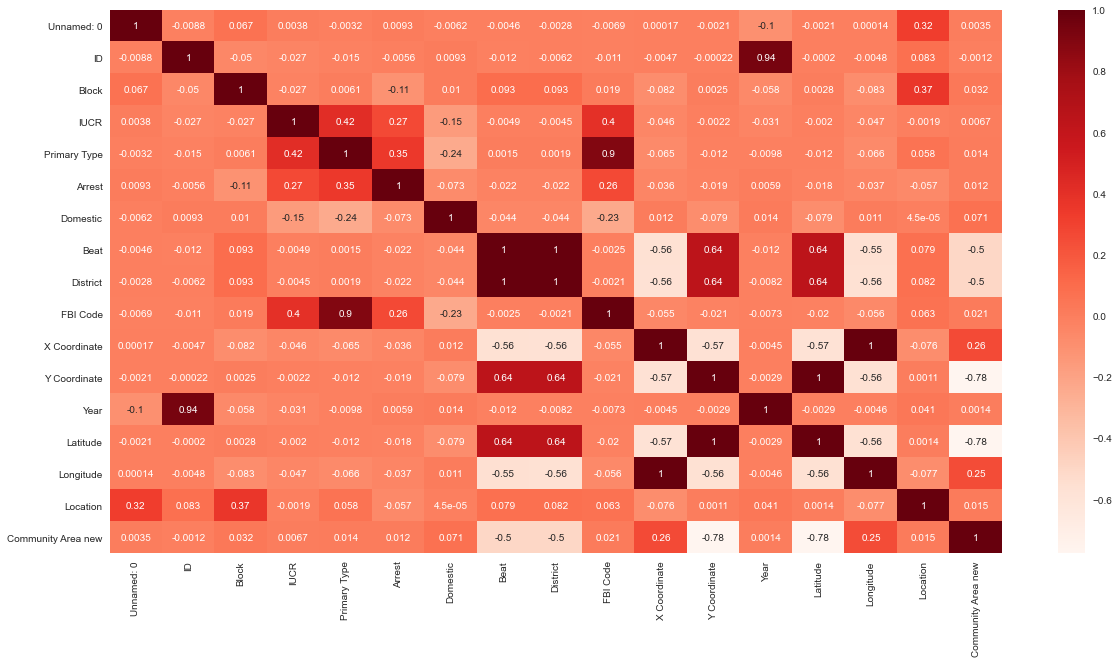

In [43]:
# Split Dataframe to target class and features
X_fs = crimes.drop(['Primary Type'], axis=1)
Y_fs = crimes['Primary Type']

#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = crimes.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [44]:
#Correlation with output variable
cor_target = abs(cor['Primary Type'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

IUCR            0.421180
Primary Type    1.000000
Arrest          0.353773
Domestic        0.238958
FBI Code        0.901990
Name: Primary Type, dtype: float64

In [45]:
# At Current Point, the attributes is select manually based on Feature Selection Part. 
Features = ["IUCR", "Description", "FBI Code"]
print('Full Features: ', Features)

Full Features:  ['IUCR', 'Description', 'FBI Code']


In [46]:
crimes

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Community Area new,Area Name,jdate,PTYPE2
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,2016-05-03 23:40:00,0,0,0,117,0,True,...,1893681.0,2016,05-10-2016 15:56,41.864073,-87.706819,0,29,North Lawndale Chicago,2016-05-03,NaN
2016-05-03 21:40:00,89,10508695,HZ250409,2016-05-03 21:40:00,1,0,0,117,1,False,...,1864330.0,2016,05-10-2016 15:56,41.782922,-87.604363,1,42,Woodlawn Chicago,2016-05-03,NaN
2016-05-03 23:31:00,197,10508697,HZ250503,2016-05-03 23:31:00,2,1,1,261,2,False,...,1904819.0,2016,05-10-2016 15:56,41.894908,-87.758372,2,25,Austin Chicago,2016-05-03,NaN
2016-05-03 22:10:00,673,10508698,HZ250424,2016-05-03 22:10:00,3,2,0,278,3,False,...,1901475.0,2016,05-10-2016 15:56,41.885687,-87.749516,3,25,Austin Chicago,2016-05-03,NaN
2016-05-03 22:00:00,911,10508699,HZ250455,2016-05-03 22:00:00,4,3,2,0,1,False,...,1901675.0,2016,05-10-2016 15:56,41.886297,-87.761751,4,25,Austin Chicago,2016-05-03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-13 16:12:00,3384640,10111143,HY299674,2015-06-13 16:12:00,2184,15,9,300,0,False,...,1894797.0,2015,08/17/2015 03:03:40 PM,41.867188,-87.716440,315712,29,North Lawndale Chicago,2015-06-13,NaN
2015-06-13 21:30:00,3384641,10111144,HY300084,2015-06-13 21:30:00,2131,71,2,231,2,False,...,1893558.0,2015,08/17/2015 03:03:40 PM,41.863197,-87.614818,2211,33,Near South Side Chicago,2015-06-13,NaN
2015-06-13 21:40:00,3384642,10111146,HY300059,2015-06-13 21:40:00,12783,2,0,278,3,True,...,1931817.0,2015,08/17/2015 03:03:40 PM,41.968625,-87.688354,292791,4,Lincoln Square Chicago,2015-06-13,NaN


# Train and Test split

In [47]:
#Split dataset to Training Set & Test Set
x, y = train_test_split(crimes, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 3)

x1 = x[Features]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[Features]    #Features to test
y2 = y[Target]      #Target Class to test

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  ['IUCR', 'Description', 'FBI Code']
Target Class        :  Primary Type
Training Set Size   :  (838798, 27)
Test Set Size       :  (209700, 27)


In [48]:
x1

,IUCR,Description,FBI Code
Date,,,
2015-05-31 19:36:00,38,239,13
2015-04-19 08:00:00,38,239,13
2014-04-17 13:45:00,26,299,8
2012-06-08 14:00:00,246,12,2
2012-08-31 03:47:00,4,31,3
...,...,...,...
2013-07-15 21:45:00,10,278,7
2013-02-27 02:00:00,41,203,12
2013-08-16 11:36:00,0,117,0


In [49]:
y1

,IUCR,Description,FBI Code
Date,,,
2014-04-02 17:05:00,38,239,13
2014-07-29 11:15:00,26,299,8
2013-07-06 11:40:00,38,239,13
2015-01-14 04:28:00,74,252,13
2014-03-15 19:43:00,26,299,8
...,...,...,...
2014-12-09 18:22:00,80,181,8
2012-06-23 23:35:00,209,84,19
2014-03-05 06:00:00,7,223,2


# Model building

In [50]:
# Random Forest
# Create Model with configuration
rf_model = RandomForestClassifier(n_estimators=70, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True, 
                                  max_depth = 50, 
                                  min_samples_leaf = 25)

# Model Training
rf_model.fit(X=x1,
             y=x2)

# Prediction
result = rf_model.predict(y[Features])

In [51]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)


C:\Users\vushk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========== Random Forest Results ==========
Accuracy    :  0.9996137339055794
Recall      :  0.9996137339055794
Precision   :  0.9994864981407904
F1 Score    :  0.9996137339055794


In [52]:
print("Confusion Matrix: ")
print(confusion_m)

Confusion Matrix: 
[[37913     0     0 ...     0     0     0]
 [    0  2039     0 ...     0     0     0]
 [    0     0 47455 ...     0     0     0]
 ...
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]]


In [53]:
crimes

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Community Area new,Area Name,jdate,PTYPE2
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,2016-05-03 23:40:00,0,0,0,117,0,True,...,1893681.0,2016,05-10-2016 15:56,41.864073,-87.706819,0,29,North Lawndale Chicago,2016-05-03,NaN
2016-05-03 21:40:00,89,10508695,HZ250409,2016-05-03 21:40:00,1,0,0,117,1,False,...,1864330.0,2016,05-10-2016 15:56,41.782922,-87.604363,1,42,Woodlawn Chicago,2016-05-03,NaN
2016-05-03 23:31:00,197,10508697,HZ250503,2016-05-03 23:31:00,2,1,1,261,2,False,...,1904819.0,2016,05-10-2016 15:56,41.894908,-87.758372,2,25,Austin Chicago,2016-05-03,NaN
2016-05-03 22:10:00,673,10508698,HZ250424,2016-05-03 22:10:00,3,2,0,278,3,False,...,1901475.0,2016,05-10-2016 15:56,41.885687,-87.749516,3,25,Austin Chicago,2016-05-03,NaN
2016-05-03 22:00:00,911,10508699,HZ250455,2016-05-03 22:00:00,4,3,2,0,1,False,...,1901675.0,2016,05-10-2016 15:56,41.886297,-87.761751,4,25,Austin Chicago,2016-05-03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-13 16:12:00,3384640,10111143,HY299674,2015-06-13 16:12:00,2184,15,9,300,0,False,...,1894797.0,2015,08/17/2015 03:03:40 PM,41.867188,-87.716440,315712,29,North Lawndale Chicago,2015-06-13,NaN
2015-06-13 21:30:00,3384641,10111144,HY300084,2015-06-13 21:30:00,2131,71,2,231,2,False,...,1893558.0,2015,08/17/2015 03:03:40 PM,41.863197,-87.614818,2211,33,Near South Side Chicago,2015-06-13,NaN
2015-06-13 21:40:00,3384642,10111146,HY300059,2015-06-13 21:40:00,12783,2,0,278,3,True,...,1931817.0,2015,08/17/2015 03:03:40 PM,41.968625,-87.688354,292791,4,Lincoln Square Chicago,2015-06-13,NaN


# Prediction


In [54]:
def predict_crime(IUCR,description,FBICode):
    descriptions=['$500 AND UNDER','ABUSE/NEGLECT: CARE FACILITY','AGG CRIM SEX ABUSE FAM MEMBER','AGG CRIMINAL SEXUAL ABUSE','AGG PO HANDS ETC SERIOUS INJ','AGG PO HANDS NO/MIN INJURY','AGG PRO EMP HANDS SERIOUS INJ','AGG PRO.EMP: HANDGUN','AGG PRO.EMP: OTHER DANG WEAPON','AGG PRO.EMP: OTHER FIREARM','AGG PRO.EMP:KNIFE/CUTTING INST','AGG SEX ASSLT OF CHILD FAM MBR','AGG: FINANCIAL ID THEFT','AGG: HANDS/FIST/FEET NO/MINOR INJURY',
             'AGG: HANDS/FIST/FEET SERIOUS INJURY','AGGRAVATED','AGGRAVATED COMPUTER TAMPERING','AGGRAVATED DOMESTIC BATTERY: HANDGUN','AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET SERIOUS INJURY','AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST','AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON','AGGRAVATED FINANCIAL IDENTITY THEFT','AGGRAVATED OF A CHILD','AGGRAVATED OF A SENIOR CITIZEN','AGGRAVATED OF A UNBORN CHILD','AGGRAVATED PO: HANDGUN','AGGRAVATED PO: KNIFE/CUT INSTR',
             'AGGRAVATED PO: OTHER DANG WEAP','AGGRAVATED PO: OTHER FIREARM','AGGRAVATED PO:KNIFE/CUT INSTR','AGGRAVATED VEHICULAR HIJACKING','AGGRAVATED: HANDGUN','AGGRAVATED: KNIFE/CUT INSTR','AGGRAVATED: OTHER','AGGRAVATED: OTHER DANG WEAPON','AGGRAVATED: OTHER FIREARM','AGGRAVATED:KNIFE/CUTTING INSTR','AIDING ARRESTEE ESCAPE','ALTER COINS','ALTER/FORGE PRESCRIPTION','ANIMAL ABUSE/NEGLECT','ANIMAL FIGHTING','ARMED VIOLENCE','ARMED WHILE UNDER THE INFLUENCE','ARMED: HANDGUN','ARMED: OTHER DANGEROUS WEAPON'
            'ARMED: OTHER FIREARM','ARMED:KNIFE/CUTTING INSTRUMENT','ARSON THREAT','ARSONIST: ANNUAL REGISTRATION','ATT AGG CRIMINAL SEXUAL ABUSE','ATT CRIM SEXUAL ABUSE','ATT: AUTOMOBILE','ATT: TRUCK, BUS, MOTOR HOME','ATTEMPT - FINANCIAL IDENTITY THEFT','ATTEMPT AGG: HANDGUN','ATTEMPT AGG: KNIFE/CUT INSTR','ATTEMPT AGG: OTHER','ATTEMPT AGG: OTHER DANG WEAPON','ATTEMPT ARSON','ATTEMPT FINANCIAL IDENTITY THEFT','ATTEMPT FORCIBLE ENTRY','ATTEMPT NON-AGGRAVATED','ATTEMPT POSSESSION CANNABIS','ATTEMPT POSSESSION NARCOTICS','ATTEMPT THEFT','ATTEMPT: AGGRAVATED',
        'ATTEMPT: ARMED-HANDGUN','ATTEMPT: ARMED-KNIFE/CUT INSTR','ATTEMPT: ARMED-KNIFE/CUT INSTR','ATTEMPT: ARMED-OTHER DANG WEAP','ATTEMPT: ARMED-OTHER FIREARM','ATTEMPT: CYCLE, SCOOTER, BIKE NO VIN','ATTEMPT: CYCLE, SCOOTER, BIKE W-VIN','ATTEMPT: STRONGARM-NO WEAPON','AUTOMOBILE','BIGAMY','BOARD PLANE WITH WEAPON','BOGUS CHECK','BOMB THREAT','BOOKMAKING/SPORTS','BRIBERY','BY EXPLOSIVE','BY FIRE','CALCULATED CANNABIS CONSPIRACY','CALL OPERATION','CANNABIS PLANT','CHILD ABANDONMENT','CHILD ABDUCTION','CHILD ABDUCTION/STRANGER','CHILD ABUSE'
            'CHILD PORNOGRAPHY', 'COMMERCIAL SEX ACTS','COMPELLING CONFESSION','COMPELLING ORG MEMBERSHIP','COMPOUNDING A CRIME','COMPUTER FRAUD','CONCEALED CARRY LICENSE REVOCATION','CONCEALING/AIDING A FUGITIVE','CONT SUBS:FAIL TO MAINT RECORD','CONTRIBUTE CRIM DELINQUENCY JUVENILE','CONTRIBUTE DELINQUENCY OF A CHILD','COUNTERFEIT CHECK','COUNTERFEITING DOCUMENT','CREDIT CARD FRAUD','CRIM SEX ABUSE BY FAM MEMBER','CRIMINAL DEFACEMENT','CRIMINAL DRUG CONSPIRACY','CRIMINAL SEXUAL ABUSE','CRIMINAL TRANSMISSION OF HIV','CYBERSTALKING',
             'CYCLE, SCOOTER, BIKE NO VIN','CYCLE, SCOOTER, BIKE W-VIN','DECEPTIVE COLLECTION PRACTICES','DEFACE IDENT MARKS OF FIREARM','DEL CONT SUBS TO PERSON <18','DELIVERY CONTAINER THEFT','DOMESTIC BATTERY SIMPLE','EAVESDROPPING','EDUCATIONAL INTIMIDAITON','EMBEZZLEMENT','EMPLOY MINOR','ENDANGERING LIFE/HEALTH CHILD','ESCAPE','EXTORTION','FAIL REGISTER LIC:CONT SUBS','FALSE FIRE ALARM','FALSE POLICE REPORT','FALSE/STOLEN/ALTERED TRP','FINAN EXPLOIT-ELDERLY/DISABLED','FINANCIAL ID THEFT: OVER $300','FIREARM REGISTRATION VIOLATION','FIRST DEGREE MURDER','FOID - REVOCATION',
             'FORCIBLE DETENTION','FORCIBLE ENTRY','FORFEIT PROPERTY','FORGERY','FORNICATION','FOUND PASSPORT','FOUND SUSPECT NARCOTICS','FRAUD OR CONFIDENCE GAME','FROM BUILDING','FROM COIN-OP MACHINE/DEVICE','GAME/AMUSEMENT DEVICE','GAME/CARDS','GAME/DICE','GUN OFFENDER NOTIFICATION-NO CONTACT','GUN OFFENDER: ANNUAL REGISTRATION','GUN OFFENDER: DUTY TO REGISTER','GUN OFFENDER: DUTY TO REPORT CHANGE OF INFORMATION','HARASSMENT BY ELECTRONIC MEANS','HARASSMENT BY TELEPHONE','HARASSMENT BY TELEPHONE','HARBOR RUNAWAY','HAZARDOUS MATERIALS VIOLATION','HAZARDOUS MATERIALS VIOLATION',
             'ILLEGAL CONSUMPTION BY MINOR','ILLEGAL POSSESSION CASH CARD','IMPERSONATION','IN TAVERN','INDECENT SOLICITATION/ADULT','INDECENT SOLICITATION/CHILD','INSTITUTIONAL VANDALISM','INSURANCE FRAUD','INTERFERE W/ EMERGENCY EQUIP','INTERFERE W/ HIGHER EDUCATION','INTERFERENCE JUDICIAL PROCESS','INTIMIDATION','INTOXICATING COMPOUNDS','INVOLUNTARY MANSLAUGHTER','INVOLUNTARY SERVITUDE','JUVENILE PIMPING','KEEP PLACE OF PROSTITUTION','KIDNAPPING','LIBRARY THEFT','LIBRARY VANDALISM','LICENSE VIOLATION','LICENSED PREMISE','LIQUOR LICENSE VIOLATION','LOST PASSPORT','MANU/DEL:CANNABIS 10GM OR LESS',
              'MANU/DEL:CANNABIS OVER 10 GMS','MANU/DELIVER: HALLUCINOGEN','MANU/DELIVER: HEROIN (WHITE)','MANU/DELIVER: HEROIN(BRN/TAN)','MANU/DELIVER: METHAMPHETAMINES','MANU/DELIVER:AMPHETAMINES','MANU/DELIVER:BARBITUATES','MANU/DELIVER:COCAINE','MANU/DELIVER:CRACK','MANU/DELIVER:HEROIN(BLACK TAR)','MANU/DELIVER:LOOK-ALIKE DRUG','MANU/DELIVER:LOOK-ALIKE DRUG','MANU/DELIVER:PCP','MANU/DELIVER:SYNTHETIC DRUGS','MANU/POSS. W/INTENT TO DELIVER: SYNTHETIC MARIJUANA','MINOR MISREPRESENT AGE','MOB ACTION','MONEY LAUNDERING','NON-AGGRAVATED','NOTIFICATION OF CIVIL NO CONTACT ORDER','NOTIFICATION OF STALKING - NO CONTACT ORDER'
             'OBSCENE MATTER','OBSCENE TELEPHONE CALLS','OBSCENITY','OBSTRUCTING IDENTIFICATION','OBSTRUCTING JUSTICE','OBSTRUCTING SERVICE','OF UNBORN CHILD','OFFICIAL MISCONDUCT','OTHER','OTHER ARSON/EXPLOSIVE INCIDENT','OTHER CRIME AGAINST PERSON','OTHER CRIME INVOLVING PROPERTY','OTHER OFFENSE','OTHER PROSTITUTION OFFENSE','OTHER VEHICLE OFFENSE','OTHER VIOLATION','OTHER WEAPONS VIOLATION','OVER $500','PANDERING','PAROLE VIOLATION','PATRONIZE JUVENILE PROSTITUTE','PATRONIZING A PROSTITUTE','PAY TV SERVICE OFFENSES','PEEPING TOM','PIMPING','POCKET-PICKING','POS: CHEMICAL/DRY-ICE DEVICE','POS: EXPLOSIVE/INCENDIARY DEV',
'PURSE-SNATCHING','RECKLESS CONDUCT','RECKLESS FIREARM DISCHARGE','RECKLESS HOMICIDE','RESIST/OBSTRUCT/DISARM OFFICER','RETAIL THEFT','SALE TOBACCO PRODUCTS TO MINOR','SALE/DEL DRUG PARAPHERNALIA','SALE/DEL HYPODERMIC NEEDLE','SALE/DIST OBSCENE MAT TO MINOR','SELL/ADVERTISE FIREWORKS','SELL/GIVE/DEL LIQUOR TO MINOR','SEX ASSLT OF CHILD BY FAM MBR','SEX OFFENDER: FAIL REG NEW ADD','SEX OFFENDER: FAIL TO REGISTER','SEX OFFENDER: PROHIBITED ZONE','SEX RELATION IN FAMILY','SEXUAL EXPLOITATION OF A CHILD','SIMPLE','SOLICIT FOR BUSINESS','SOLICIT FOR PROSTITUTE','SOLICIT NARCOTICS ON PUBLICWAY','SOLICIT OFF PUBLIC WAY','SOLICIT ON PUBLIC WAY',
              'STOLEN PROP: BUY/RECEIVE/POS.','STRONGARM - NO WEAPON','TAMPER WITH MOTOR VEHICLE','TELEPHONE THREAT','THEFT BY LESSEE,MOTOR VEH','THEFT BY LESSEE,NON-VEH','THEFT OF LABOR/SERVICES','THEFT OF LOST/MISLAID PROP','THEFT/RECOVERY: AUTOMOBILE','THEFT/RECOVERY: CYCLE, SCOOTER, BIKE NO VIN','THEFT/RECOVERY: CYCLE, SCOOTER, BIKE W-VIN','THEFT/RECOVERY: TRUCK,BUS,MHOME','TO AIRPORT','TO CITY OF CHICAGO PROPERTY','TO FIRE FIGHT.APP.EQUIP','TO LAND','TO PROPERTY','TO RESIDENCE','TO STATE SUP LAND','TO STATE SUP PROP','TO VEHICLE','TRUCK, BUS, MOTOR HOME','UNAUTHORIZED VIDEOTAPING','UNIDENTIFIABLE RECORDING SOUND','UNLAWFUL ENTRY',
              'UNLAWFUL INTERFERE/VISITATION','UNLAWFUL POSS AMMUNITION','UNLAWFUL POSS OF HANDGUN','UNLAWFUL POSS OTHER FIREARM','UNLAWFUL RESTRAINT','UNLAWFUL SALE HANDGUN','UNLAWFUL USE OF A COMPUTER','UNLAWFUL USE OF BODY ARMOR','UNLAWFUL USE OF RECORDED SOUND','UNLAWFUL USE OTHER DANG WEAPON','UNLAWFUL USE OTHER FIREARM','UNLAWFUL USE/SALE AIR RIFLE','VEHICLE TITLE/REG OFFENSE','VEHICULAR HIJACKING','VIO BAIL BOND: DOM VIOLENCE','VIOLATE ORDER OF PROTECTION','VIOLATION GPS MONITORING DEVICE','VIOLATION OF CIVIL NO CONTACT ORDER','VIOLATION OF SMOKING BAN','VIOLATION OF STALKING NO CONTACT ORDER','VIOLENT OFFENDER: ANNUAL REGISTRATION','VIOLENT OFFENDER: DUTY TO REGISTER','VIOLENT OFFENDER: FAIL TO REGISTER NEW ADDRESS']
    
    X = np.zeros(len(x1.columns))
    X[0] = IUCR
    X[1] = FBICode
    i=0
    while(i<len(descriptions)):
        if descriptions[i]==description:
            x[2]=i
        i+=1
    
    

    return rf_model.predict([X])[0]

In [55]:
predict_crime(38,'$500 AND UNDER',13)

<ipython-input-54-06652fa542fb>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[2]=i


0